<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup cell

In [1]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap


rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 7.3 MB/s eta 0:00:00


Load data

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')

Mounted at /content/drive


/tmp/ipython-input-1578516001.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


هیستوگرام سال ساخت را رسم کنید



In [3]:
col_type = df['construction_year'].dtype.name
col_type

'object'

In [4]:
nan_count = df['construction_year'].isna().sum()
nan_percent = (nan_count / len(df)) * 100
nan_percent

np.float64(18.4172)

In [5]:
print(df['construction_year'].unique())


[nan '۱۳۸۴' '۱۴۰۱' '۱۴۰۰' '۱۴۰۳' '۱۳۸۹' '۱۳۹۵' '۱۳۹۳' '۱۳۹۶' '۱۳۸۷' '۱۳۸۵'
 '۱۳۹۰' '۱۳۹۸' '۱۴۰۲' '۱۳۸۸' 'قبل از ۱۳۷۰' '۱۳۹۲' '۱۳۸۳' '۱۳۹۴' '۱۳۹۱'
 '۱۳۸۰' '۱۳۷۸' '۱۳۷۵' '۱۳۹۷' '۱۳۹۹' '۱۳۸۲' '۱۳۸۶' '۱۳۷۹' '۱۳۷۲' '۱۳۷۴'
 '۱۳۷۶' '۱۳۷۷' '۱۳۷۱' '۱۳۸۱' '۱۳۷۳']


In [6]:
df['construction_year'].value_counts()


,count
construction_year,
۱۴۰۳,116260
۱۳۹۰,59139
۱۴۰۲,58424
۱۴۰۰,53674
۱۳۹۵,53029
۱۳۹۸,38207
۱۳۹۷,36326
۱۳۹۶,35487
۱۴۰۱,35328


Drop nan values

In [7]:
df_clean = df.dropna(subset=['construction_year']).copy()

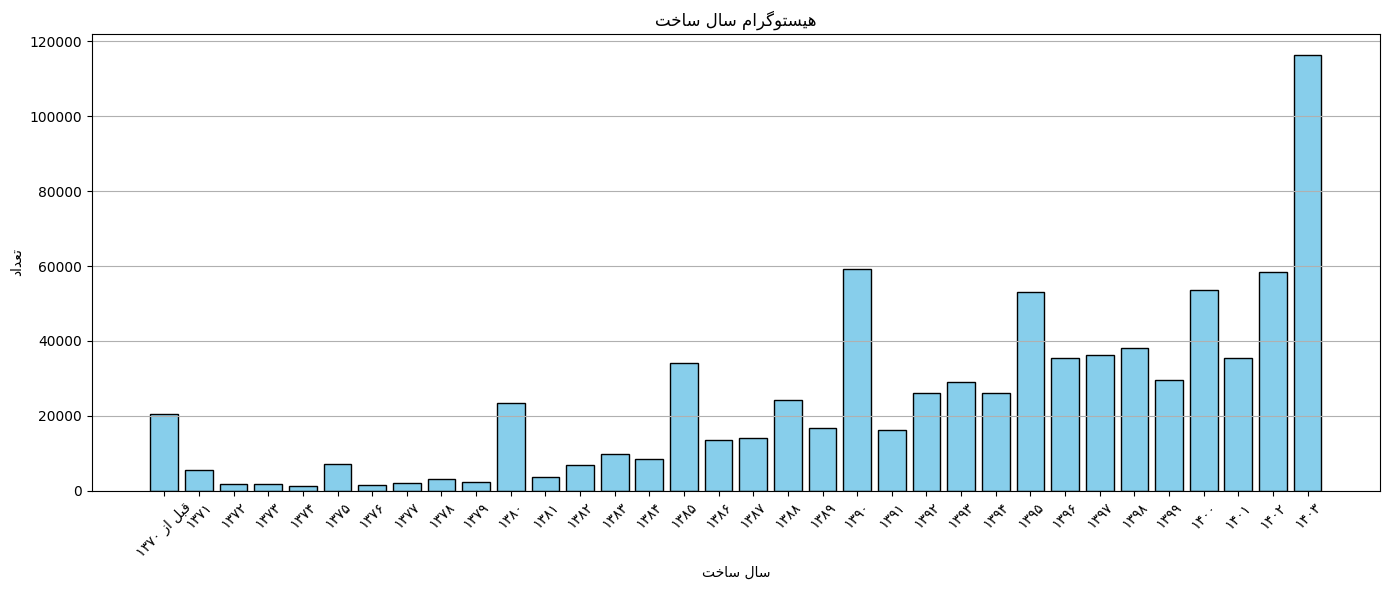

In [8]:
year_counts = df_clean['construction_year'].value_counts().sort_index()

labels = [fa_label(label) for label in year_counts.index]

plt.figure(figsize=(14, 6))
plt.bar(labels, year_counts.values, color='skyblue', edgecolor='black')
plt.title(fa_label('هیستوگرام سال ساخت'))
plt.xlabel(fa_label('سال ساخت'))
plt.ylabel(fa_label('تعداد'))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

